## Detección de Parkinson mediante Aprendizaje Profundo
### Gabriel Baltodano Dormond

Los algoritmos de aprendizaje automático demuestran ser de gran utilidad para la detección, monitoreo, diagnóstico y soporte de teraía para una gran cantidad de enfermedades. A razón de esto, se identifica una forma de realizar diagnósticos de manera no invaisa en tiempo real y de bajo costo para el estudio de ciertas patologías. De tal manera, se pretende trabajar específicamente con el diagnóstico del Parkinson, basado en las investigaciones de [1], [2] y [3]. 

El Parkinson es una de las enfermedades neurodegenerativas más comunes en
la población mundial. Este padecimiento, afecta las habilidades motoras y cognitivas de
los pacientes [2]. Uno de los síntomas más notorios es la Disartria Hipocinética, la cuál,
se caracteriza por causar dificultad para mover los músculos faciales y la lengua. Esto
genera dificultad para hablar, ritmo lento al hablar y una voz áspera [2]. Vale resaltar,
que este es uno de los primeros síntomas que aparecen al tener esta enfermedad, de modo
que se identifica un posible uso del análisis del habla para la detección del Parkinson.

El diagnóstico de esta enfermedad es posible al analizar los datos provistos por [4] y [5], mediante algorimtos de clasificación y se encuentra la base datos  en el siguiente link: https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set. Los atributos presentes en la matriz de datos son:

- **name**: Nombre en formato ASCII del sujeto y número de grabación.
- **MDVP:Fo(Hz)**: Frecuencia fundamental vocal promedio.
- **MDVP:Fhi(Hz)**: Máxima frecuencia fundamental vocal.
- **MDVP:Flo(Hz)**: Mínima frecuencia fundamental vocal.
- **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP**: Varias medidas de variación en la frecuencia fundamental.
- **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA**: Varias medidas de variación en la amplitud.
- **NHR, HNR**: Dos medidas de la relación entre componentes de ruido y componentes tonales en la voz.
- **status**: Estado de salud del sujeto: (uno) - Parkinson, (cero) - saludable.
- **RPDE, D2**: Dos medidas de complejidad dinámica no lineal.
- **DFA**: Exponente de escalamiento fractal de la señal.
- **spread1, spread2, PPE**: Tres medidas no lineales de variación en la frecuencia fundamental.


## Procedimiento
Primero se importan las librerías necesarias para la implementación del análisis:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree



Se importan los datos del Archivo Datos.csv, el cual trae el conjunto de datos expuesto con anterioridad, para explorar las características presentes en el conjunto de datos.


In [2]:
df = pd.read_csv('Datos.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
# Revisa si no hay datos nulos en el conjunto
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No hay datos nulos, entonces procedemos a analizar características básicas en los datos.

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Se genera la distribución de los audios etiquetados con status positivo y estatus negativo, de modo que se observa que predominan los casos positivos en el set de datos. Posterior a esto se gráfica la distribución de los datos del conjunto mediante un histograma para observar las tendencias en los datos de manera gráfica. Tambíen se gráfica la correlación de los datos para observar ciertas caracerísticas.

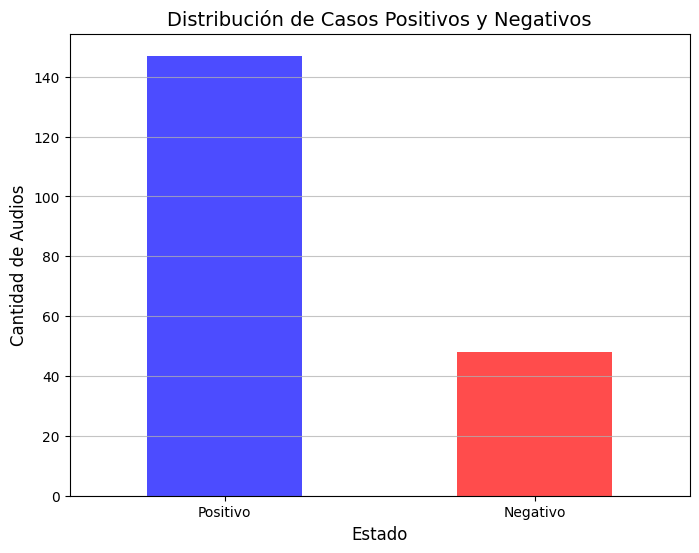

In [6]:
# Contar la cantidad de casos por cada valor de 'status'
status_counts = df['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7)

# Configurar etiquetas y título
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cantidad de Audios', fontsize=12)
plt.title('Distribución de Casos Positivos y Negativos', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Positivo', 'Negativo'], rotation=0, fontsize=10)

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

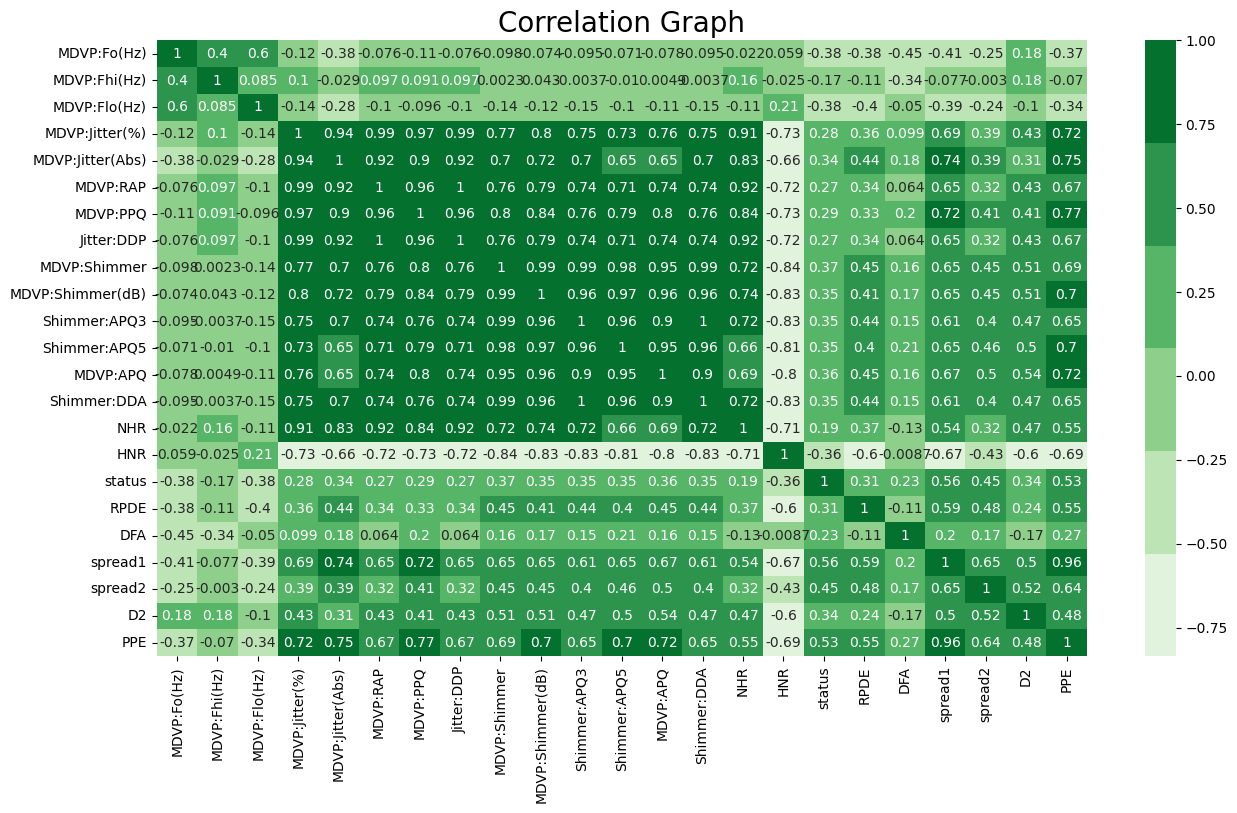

In [7]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Greens")
# Se elmina la etiqueta de nombre ya que no aporta información relevante.

df_ = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_.corr(), annot=True, cmap=cmap)

plt.show()

El gráfico indica que existe una fuerte correlación entre los parámetros que tienen el en su etiqueta en la palabra Shimmer lo cual tiene sentido ya que son parámetros que cuantifican el mismo atributo, en cargado de medir la variación de la mplitud de la señal. Esto tambíen ocurre con el Jitter, el cual presenta alta correlación con términos que contengan esta palabra y todos se encatgan de caracterízar el atributo que mide la varaxión de la frecuencia fundamental entre ciclos. 
## Evaluación de Modelos

Se utilizarás los sigueintes modelos para realziar la clasificación:
- **KNN**
- **SVM**
- **Naive Bayes**
- **Árbol de decisión**
- **Regresión Logística**
- **MLP**

Como los datos se encuentran en escalas diferentes como Hz, dB y %, se normnalizan los datos mediante MinMaxScaler. Además, se define Status como las salida Y y X como el vector que contiene todas las otras características. Además se selecciona el 15% de los datos como conjunto de prueba y el otro 85% como conjunto de entrenamiento, de forma aleatoria. Esto por que se recomienda que el conjunto de prueba este entre un 10% y 30% de los datos totales.


In [8]:
scaler = MinMaxScaler()

# Se definen los conjuntos X y Y
X=df.drop(['name','status'],axis=1)
y=df["status"]

# Se normalizan datos de X
X_scaled = scaler.fit_transform(X) 

# Separan datos en conjunto de entrenamiento y prueba
X_entr, X_prueba, y_entr, y_prueba = train_test_split(X_scaled, y, test_size=0.15, random_state=42)


### KNN

In [9]:
# Entrenamos el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_entr, y_entr)

# Predicción
y_pred_knn = knn.predict(X_prueba)

Matriz_knn = confusion_matrix(y_prueba, y_pred_knn)
print(Matriz_knn)

[[ 3  1]
 [ 0 26]]


### Naive Bayes

In [10]:
# Entrenamos el modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_entr, y_entr)

# Predicción
y_pred_nb = nb.predict(X_prueba)

Matriz_NB = confusion_matrix(y_prueba,y_pred_nb)
print(Matriz_NB)


[[ 3  1]
 [ 6 20]]


### Support Vector Machine

In [11]:
SVM = SVC(probability=True, kernel = 'linear')

# Se entrena el modelo con los conjuntos de entrenamiento 
SVM.fit(X_entr, y_entr)
y_pred_SVM = SVM.predict(X_prueba)
Matriz_SVM = confusion_matrix(y_prueba,y_pred_SVM)
print(Matriz_SVM)


[[ 2  2]
 [ 0 26]]


### Arbol de desición


In [12]:
# Entrenamos el modelo Árbol de Decisión
arbol = DecisionTreeClassifier()
arbol.fit(X_entr, y_entr)

# Predicción
y_pred_arbol = arbol.predict(X_prueba)

Matriz_Arbol = confusion_matrix(y_prueba,y_pred_arbol)

print(Matriz_Arbol)


[[ 3  1]
 [ 1 25]]


### Regresión Logistica 


In [13]:
# Creamos el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenamos el modelo
log_reg.fit(X_entr, y_entr)

# Realizamos predicciones
y_pred_RL = log_reg.predict(X_prueba)

# Evaluamos el modelo
print("Matriz de confusión:\n", confusion_matrix(y_prueba, y_pred_RL))


Matriz de confusión:
 [[ 2  2]
 [ 1 25]]


In [14]:

# Lista de predicciones ya generadas
models = {
    'Regresión Logística': y_pred_RL,  # predicciones para Logistic Regression
    'KNN': y_pred_knn,                # predicciones para KNN
    'SVM': y_pred_SVM,                # predicciones para SVM
    'Naive Bayes': y_pred_nb,         # predicciones para Naive Bayes
    'Árbol de decisión': y_pred_arbol     # predicciones para Decision Tree
}

# Lista para almacenar los resultados
results = []

# Se asume que 'y_prueba' es el conjunto de etiquetas verdaderas (real labels)
for model_name, y_pred in models.items():
    # Obtener el reporte de clasificación
    report = classification_report(y_prueba, y_pred, output_dict=True)
    
    # Extraer las métricas de la clase positiva 
    metrics = report['1']
    acu = report['accuracy']
    # Guardar las métricas
    results.append([model_name, acu, metrics['precision'], metrics['recall'], metrics['f1-score']])

# Convertir la lista de resultados en un DataFrame
metrics_df = pd.DataFrame(results, columns=['Modelo','Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_df

,Modelo,Accuracy,Precision,Recall,F1-Score
0,Regresión Logística,0.900000,0.925926,0.961538,0.943396
1,KNN,0.966667,0.962963,1.000000,0.981132
2,SVM,0.933333,0.928571,1.000000,0.962963
3,Naive Bayes,0.766667,0.952381,0.769231,0.851064
4,Árbol de decisión,0.933333,0.961538,0.961538,0.961538


### MLP
Para el perceptrón multicapa, se utiliza la clase MLPClassifier de Scikit learn, además el conjunto de datos se dividira en 70% para entrenamiento, 20% para Validación y 10% de prueba. Además, se escogen varias redes con varios parametros para corroborar que configuración tiene mejor desempeño.

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Se definen los conjuntos X y Y
X=df.drop(['name','status'],axis=1)
y=df["status"]

# Se normalizan datos de X
X_scaled = scaler.fit_transform(X) 

# Separan datos en conjunto de entrenamiento y un conjunto X1
X_entr, X_prueba, y_entr, y_prueba = train_test_split(X_scaled, y, test_size=0.30, random_state=42)


# Definir los parámetros a probar en la búsqueda
param_grid = {
    'hidden_layer_sizes': [(10,10,10),(15,15),(23, 23, 23), (23, 23), (10, 10)],  # Combinaciones de capas y neuronas
    'max_iter': [2000, 5000, 10000],  # Valores de max_iter a probar
}

# Crear el modelo base
mlp = MLPClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_entr, y_entr)

# Imprimir el mejor conjunto de parámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Hacer predicciones con el mejor modelo encontrado
y_pred = grid_search.best_estimator_.predict(X_prueba)

# Calcular el accuracy
accuracy = accuracy_score(y_prueba, y_pred)
print( confusion_matrix(y_prueba, y_pred))




Mejores parámetros encontrados:  {'hidden_layer_sizes': (23, 23, 23), 'max_iter': 2000}
[[12  3]
 [ 2 42]]


In [16]:
print(classification_report(y_prueba, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59



### Referencias
1. F. Amato, G. Saggio, V. Cesarini, G. Olmo, and G. Costantini, “Machine learning-
and statistical-based voice analysis of parkinson’s disease patients: A survey”, Expert
Systems With Applications, vol. 219, p. 119 651, 2023. [Online]. Available: https:
//doi.org/10.1016/j.eswa.2023.119651.
2. R. Khaskhoussy and Y. B. Ayed, “Improving parkinson’s disease recognition through
voice analysis using deep learning”, Pattern Recognition Letters, vol. 168, pp. 64–70,
2023. [Online]. Available: https://doi.org/10.1016/j.patrec.2023.03.011.
3. M. S. R. Sajal, M. T. Ehsan, R. Vaidyanathan, S. Wang, T. Aziz, and K. A. A.
Mamun, “Telemonitoring parkinson’s disease using machine learning by combining
tremor and voice analysis”, Brain Informatics, vol. 7, no. 1, pp. 1–11, 2020. [Online].
Available: https://doi.org/10.1186/s40708-020-00113-1.
4. M. A. Little, P. E. McSharry, S. J. Roberts, D. A. Costello, and I. M. Moroz, “Exploit-
ing nonlinear recurrence and fractal scaling properties for voice disorder detection”,
BioMedical Engineering OnLine, vol. 6, no. 1, pp. 1–21, 2007.
5. M. A. Little, P. E. McSharry, E. J. Hunter, and L. O. Ramig, “Suitability of dyspho-
nia measurements for telemonitoring of parkinson’s disease”, IEEE Transactions on
Biomedical Engineering, 2008.
6. F. Eyben, K. Scherer, B. Schuller, et al., “The geneva minimalistic acoustic parame-
ter set (gemaps) for voice research and affective computing”, IEEE Transactions on
Affective Computing, vol. X, no. X, pp. 1–X, 2015.

7. Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830. https://jmlr.csail.mit.edu/papers/volume12/pedregosa11a/pedregosa11a.pdf

8. L. Hasan, "Parkinson prediction: Classifiers & neural network," Kaggle, 2023. [Enlace]. Disponible en: https://www.kaggle.com/code/leilahasan/parkinson-prediction-classifiers-neuralnetwork
